In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.metrics import classification_report, precision_recall_fscore_support, roc_curve

In [2]:
initial_data = pd.read_csv('data.csv')

In [3]:
# Removing 'ID' column
initial_data.drop(initial_data.columns[0], axis=1, inplace=True)

for column in initial_data.columns:
    if "Unnamed" in column:
        initial_data.drop(column, axis = 1, inplace=True)

In [4]:
# preview the dataset
initial_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Convert to binary data
initial_data['diagnosis']=initial_data['diagnosis'].map({'M':1,'B':0})
initial_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Get X and y
X = initial_data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean','fractal_dimension_mean',
                 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
                 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst','fractal_dimension_worst']]

y = initial_data['diagnosis']

## 1. Split the dataset into training set and test set (80, 20).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [8]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (455, 30)
Shape of X_test:  (114, 30)
Shape of y_train:  (455,)
Shape of y_test (114,)


## 2. Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predictions for your data.

In [9]:
# DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

### Accuracy, Precision, Recall values

In [10]:
accuracy_score = accuracy_score(y_test, y_pred)
print("Accuracy of the model in test data: ", accuracy_score)

Accuracy of the model in test data:  0.9122807017543859


In [11]:
precision_recall_fscore_support(y_test, y_pred)

precision_values = precision_recall_fscore_support(y_test, y_pred)[0]
recall_values = precision_recall_fscore_support(y_test, y_pred)[1]

print("precision values: ", precision_values)
print("recall values: ", recall_values)

precision values:  [0.94285714 0.86363636]
recall values:  [0.91666667 0.9047619 ]


### Classification Report

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        72
           1       0.86      0.90      0.88        42

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



### Confusion Matrix

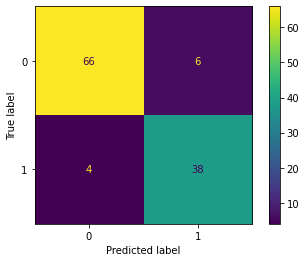

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### ROC curve

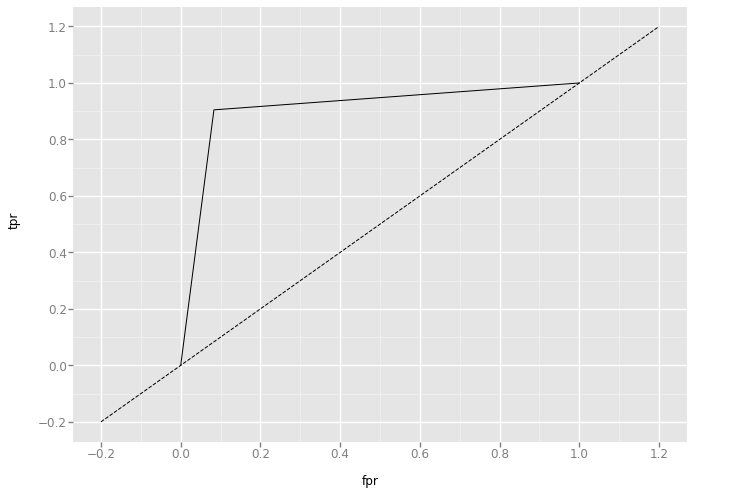

<ggplot: (8775185147923)>

In [14]:
from sklearn.metrics import roc_curve, auc
from pandas import Timestamp
import rpy2
from ggplot import *

preds = classifier.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
 geom_line() +\
 geom_abline(linetype='dashed')

### Precision Recall Display

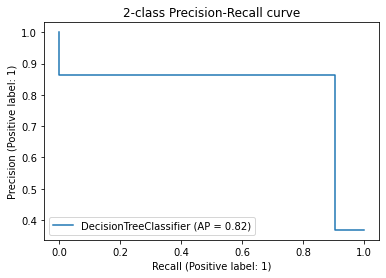

In [15]:
display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="DecisionTreeClassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


## 3. Similarly as in previous step, train another Decision Tree Classifier - but in this case set the maximum depth of the tree to 1 (max_depth = 1). Use the same training and test set as you used for the Decision Tree in the previous step.

In [23]:
# DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)
print("Accuracy of the model in test data: ", accuracy_score)

Accuracy of the model in test data:  0.8859649122807017


In [18]:
precision_recall_fscore_support(y_test, y_pred)

precision_values = precision_recall_fscore_support(y_test, y_pred)[0]
recall_values = precision_recall_fscore_support(y_test, y_pred)[1]

print("precision values: ", precision_values)
print("recall values: ", recall_values)

precision values:  [0.90410959 0.85365854]
recall values:  [0.91666667 0.83333333]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        72
           1       0.85      0.83      0.84        42

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



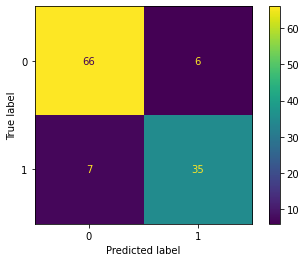

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

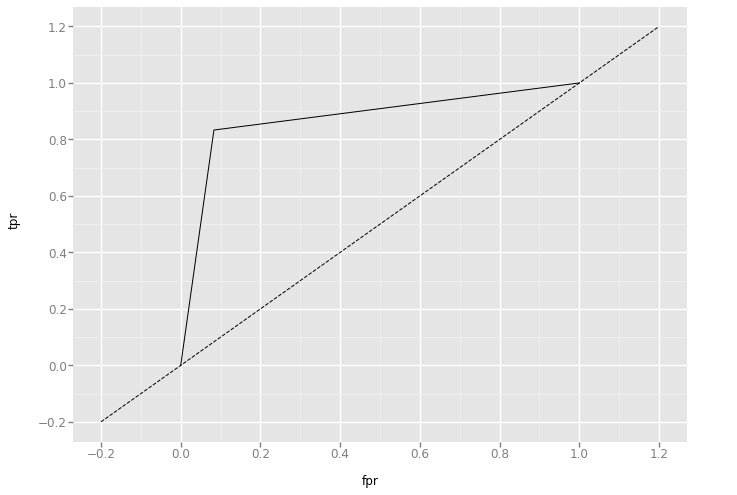

<ggplot: (8775185389891)>

In [21]:
preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
 geom_line() +\
 geom_abline(linetype='dashed')

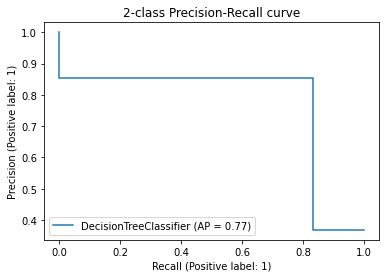

In [22]:
display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="DecisionTreeClassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

## 4. Report on the six evaluation metrics listed in objective for both the models, and com- pare their results.

The second stats are for max_depth=1

### 1. The accuracy of your model on the test data

0.912 vs 0.886
first model gives better result.


### 2. The precision and recall values
precision values:  [0.94285714 0.86363636]
recall values:  [0.91666667 0.9047619 ]


precision values:  [0.90410959 0.85365854]
recall values:  [0.91666667 0.83333333]

first model gives better result.


### 3. A classification report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        72
           1       0.86      0.90      0.88        42

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114


              precision    recall  f1-score   support

           0       0.90      0.92      0.91        72
           1       0.85      0.83      0.84        42

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114

first model gives better result.



### 4. The confusion matrix for this experiment

The first model has 4 in FP, 6 in FN
The second model has 7 in FP, 6 in FN

first model gives better result.



### 5. An ROC curve
The first model is closer to the upper left corner.


### 6. A Precision/Recall curve
The first model is closer to the upper right corner.


In conclusion, DecisionTreeClassifier with more depths provides more accurate result for predictions, compared to DecisionTreeClassifier with 1 as the max depth.